In [1]:
# !cp -r /kaggle/input/nsfw-dataset1/nsfw_dataset_v1 /kaggle/working/

In [2]:
!cp -r /kaggle/input/newst/final_dataset_nood /kaggle/working/

In [3]:
# !cp -r /kaggle/input/final-nude-dataset/final_dataset_nood /kaggle/working/

In [4]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!git clone https://github.com/emiliantolo/pytorch_nsfw_model.git

Cloning into 'pytorch_nsfw_model'...
remote: Enumerating objects: 23, done.
remote: Total 23 (delta 0), reused 0 (delta 0), pack-reused 23
Unpacking objects: 100% (23/23), 89.75 MiB | 11.96 MiB/s, done.


In [6]:
%cd pytorch_nsfw_model

/kaggle/working/pytorch_nsfw_model


In [7]:
%ls

Inference_example.ipynb  README.md                images/
Output_example.png       ResNet50_nsfw_model.pth


In [8]:
# %cd ../

In [9]:
transformations = transforms.Compose([
transforms.Resize([224,224]),
transforms.CenterCrop(224),
transforms.ToTensor(),
# transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [10]:
# train_set = datasets.ImageFolder("../nsfw_dataset_v1/train", transform = transformations)
# test_set = datasets.ImageFolder("../nsfw_dataset_v1/test", transform = transformations)

# train_set = datasets.ImageFolder("final_dataset_nood/train", transform = transformations)
# test_set = datasets.ImageFolder("final_dataset_nood/test", transform = transformations)

train_set = datasets.ImageFolder("../final_dataset_nood/train", transform = transformations)
test_set = datasets.ImageFolder("../final_dataset_nood/test", transform = transformations)

In [11]:
# drawings, hentai, neutral, porn, sexy = [0,0,0,0,0]
# for ind, el in train_set:
#     if el==0:drawings+=1
#     elif el==1:hentai+=1
#     elif el==2:neutral+=1
#     elif el==3:porn+=1
#     elif el==4:sexy+=1
# print(drawings, hentai, neutral, porn, sexy)

In [12]:
sizes_datasets = {'train_data': len(train_set), 'validation_data': len(test_set)}

In [13]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=8, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size =8, shuffle=True)

In [14]:
# print(train_loader.class_to_inx)

In [15]:
loaders_data = {'train_data': train_loader, 'validation_data': test_loader}

In [16]:
obr = transforms.Compose([transforms.ToPILImage()])
img_collect=[]
count = 0
for i,l in train_loader:
    collect = []
    print(l)
    for img in i:
        collect.append(obr(img))
    img_collect.append(collect)
    if count > 2:
        break
    count+=1

tensor([2, 0, 0, 2, 1, 2, 1, 1])
tensor([1, 2, 1, 2, 2, 2, 2, 2])
tensor([2, 1, 1, 2, 2, 1, 1, 1])
tensor([1, 0, 1, 1, 2, 0, 2, 2])


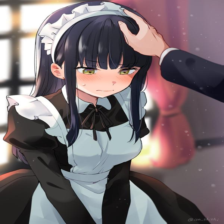

In [17]:
img_collect[0][0]

In [18]:
# #model classes
# # classes=['drawings', 'hentai', 'neutral', 'porn', 'sexy']
# classes=['nude', 'safe_people', 'safe']
# import torchvision.transforms as T
# #load images
# entries = test_loader

# for content,batch in entries:
    
#     fig=plt.figure(figsize=(10,10))
#     i=0
    
#     for entry in content:

#         #prediction
#         index = batch[i]
        
#         image = T.ToPILImage()(entry)
#         i+=1
#         sub = fig.add_subplot(1, len(batch), i)
#         sub.set_title(classes[index])
#         plt.axis('off')
#         plt.imshow(image)
#     plt.show()

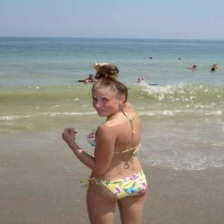

In [19]:
img_collect[0][2]

In [20]:
from __future__ import print_function, division

import torch

import torch.nn as nn

import torch.optim as optim

from torch.optim import lr_scheduler, Adam

import numpy as np

import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt

import time

import os

import copy

plt.ion()   # This is the interactive mode

In [21]:
class_names = train_set.classes

In [22]:
class_names

['marginal', 'nude', 'safe']

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [25]:
train_loss = []
test_loss = []
train_acc = []
test_acc = []
# scheduler = lr_scheduler

def model_training(res_model, criterion, optimizer, number_epochs=25):
    since = time.time()
    best_resmodel_wts = copy.deepcopy(res_model.state_dict())
    best_accuracy = 0.0
    for epochs in range(number_epochs):
        print('Epoch {}/{}'.format(epochs, number_epochs - 1))
        print('-' * 10)
        for phase in ['train_data', 'validation_data']: ## Here each epoch is having a training and validation phase
            if phase == 'train_data':
                res_model.train()  ## Here we are setting our model to training mode
            else:
                res_model.eval()   ## Here we are setting our model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            answ = np.array([])
            pred = np.array([])
            for inputs, labels in loaders_data[phase]: ## Iterating over data.
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad() ## here we are making the gradients to zero
                with torch.set_grad_enabled(phase == 'train_data'): ## forwarding and then tracking the history if only in train
                    outputs = res_model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    if phase == 'train_data': 
                        loss.backward()
                        optimizer.step()
                    answ = np.append(answ,np.array(labels.cpu()))
                    pred = np.append(pred,np.array(preds.cpu()))
               #

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

#             if phase == 'train_data':
#                 scheduler.step()
#['drawings', 'hentai', 'neutral', 'porn', 'sexy']

            ConfusionMatrixDisplay(confusion_matrix(answ,pred),display_labels=
                                   ['marginal', 'nude', 'safe']).plot()
            plt.show()
            epoch_loss = running_loss / sizes_datasets[phase]
            epoch_acc = running_corrects.double() / sizes_datasets[phase]
            if phase == 'train_data':
                train_loss.append(epoch_loss)
                train_acc.append(epoch_acc)
            else:
                test_loss.append(epoch_loss)
                test_acc.append(epoch_acc) 
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))



            if phase == 'validation_data' and epoch_acc > best_accuracy: ## deep copy the model
                
                print('Cкопировано!')

                best_accuracy = epoch_acc

                best_resmodel_wts = copy.deepcopy(res_model.state_dict())
    print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_accuracy))
     # load best model weights

    res_model.load_state_dict(best_resmodel_wts)

    return res_model

In [26]:
torch.cuda.empty_cache()

In [27]:
finetune_model = models.resnet50(pretrained=True)

num_ftrs = finetune_model.fc.in_features


finetune_model.fc = nn.Linear(num_ftrs, 3)
# nn.Sequential(nn.Linear(num_ftrs, 5),
#           nn.Softmax())


finetune_model = finetune_model.to(device)


criterion = nn.NLLLoss()


finetune_optim = optim.Adam(finetune_model.parameters(),lr=10e-4)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 152MB/s] 


In [28]:
# finetune_model = model_training(finetune_model, criterion, finetune_optim,
#                        number_epochs=25)

In [29]:
# %pip install -U git+https://github.com/platelminto/NudeNet

In [30]:
# from nudenet import NudeClassifier

# model = NudeClassifier()

In [31]:
# model.classify('/kaggle/input/probe-set/probe/00b45f1073a9ed79356b655ac83275b971933109a8fda152c0bcdacd9ca89218.jpg')

In [32]:
# model.classify('/kaggle/input/probe-set/probe/0a01c8d3b32715885ab43cd738ee74c96ebe78ca9bc4b69a3be061101329f8c5.jpg')

In [33]:
# model.classify('/kaggle/input/probe-set/probe/0a0f062cf6c12acd0cb85d477591665f8a33a21398ede93ea7addce3cda6b971.jpg')

In [34]:
# model.classify('/kaggle/input/probe-set/probe/0acba7b1dd82ea51bf9820b535704d821d003259189cd40aa15ea23a54bfa4fc.jpg')

In [35]:
# model.classify('/kaggle/input/probe-set/probe/0acba7b1dd82ea51bf9820b535704d821d003259189cd40aa15ea23a54bfa4fc.jpg')

In [36]:
# !git clone https://github.com/emiliantolo/pytorch_nsfw_model.git

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import os
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms, models
from PIL import Image
from torch.autograd import Variable

In [38]:
#image directory
data_dir = '/kaggle/input/probe-set/probe/'

'''test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])
                                     ])'''

'test_transforms = transforms.Compose([transforms.Resize(224),\n                                      transforms.CenterCrop(224),\n                                      transforms.ToTensor(),\n                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],\n                                                          std=[0.229, 0.224, 0.225])\n                                     ])'

In [39]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [40]:
'''model = models.resnet50()
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0),
                                 nn.Linear(512, 10),
                                 nn.LogSoftmax(dim=1))
if torch.cuda.is_available():
    model = model.to(device)
model.load_state_dict(torch.load('ResNet50_nsfw_model.pth'))
model.eval()'''

"model = models.resnet50()\nmodel.fc = nn.Sequential(nn.Linear(2048, 512),\n                                 nn.ReLU(),\n                                 nn.Dropout(0),\n                                 nn.Linear(512, 10),\n                                 nn.LogSoftmax(dim=1))\nif torch.cuda.is_available():\n    model = model.to(device)\nmodel.load_state_dict(torch.load('ResNet50_nsfw_model.pth'))\nmodel.eval()"

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
#prediction function
def predict_image(image):
    image_tensor = transformations(image).float()
    image_tensor = image_tensor.unsqueeze_(0)

    if torch.cuda.is_available():
        image_tensor = image_tensor.to(device)

    input = Variable(image_tensor)
    output = model(input)
    index = output.cpu().data.numpy().argmax()
    return index

In [43]:
# #model classes
# classes=['drawings', 'hentai', 'neutral', 'porn', 'sexy']

# #load images
# entries = os.listdir(data_dir)

# fig=plt.figure(figsize=(10,10))
# i=0

# for entry in entries:
#     i+=1
#     image = Image.open(data_dir+entry)
    
#     #prediction
#     index = predict_image(image)
    
#     sub = fig.add_subplot(1, len(entries), i)
#     sub.set_title(classes[index])
#     plt.axis('off')
#     plt.imshow(image)
# plt.show()

In [44]:
model = models.resnet50(pretrained=True)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [45]:

model = models.resnet50(pretrained=True)
in_features = model.fc.in_features


fc = nn.Linear(in_features = in_features, out_features = 3)
model.fc = fc
'''model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.05),
                                 nn.Linear(512, 3),
                                 nn.ReLU())'''
if torch.cuda.is_available():
    model = model.to(device)
#model.eval()

In [46]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [47]:
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True
for param in finetune_model.layer4[2].parameters():
    param.requires_grad = True
for param in finetune_model.layer3[2].parameters():
    param.requires_grad = True

In [48]:
weight = torch.tensor([1.0, 1.5, 1.0])
# weight = torch.tensor([1.0, 1.5, 1.0, 1.0, 1.5])
class_weights = torch.FloatTensor(weight).cuda()
criterion = nn.CrossEntropyLoss(weight=class_weights)
#criterion = nn.NLLLoss(weight=weight)
#criterion = nn.CrossEntropyLoss()
finetune_optim = optim.Adam(model.parameters(),lr=10e-4)

In [49]:
train_loss = []
test_loss = []
train_acc = []
test_acc = []

Epoch 0/10
----------


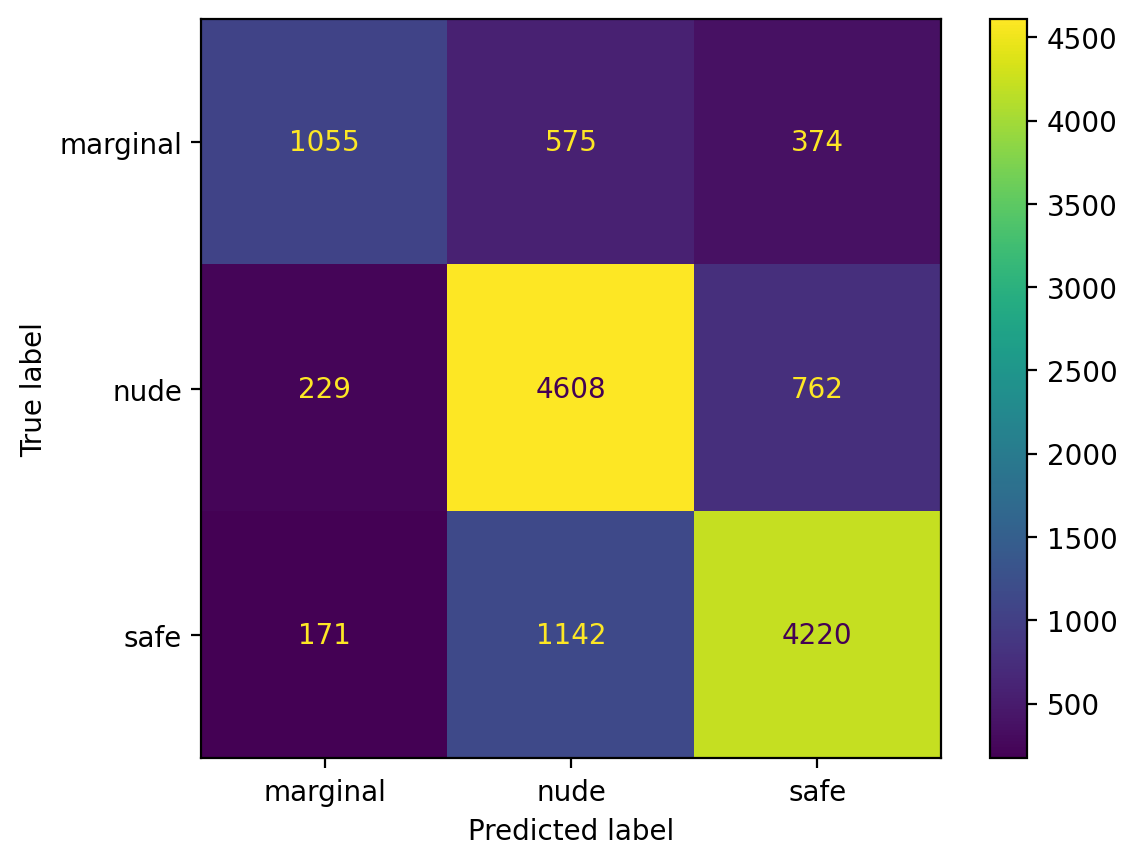

train_data Loss: 0.5908 Acc: 0.7524


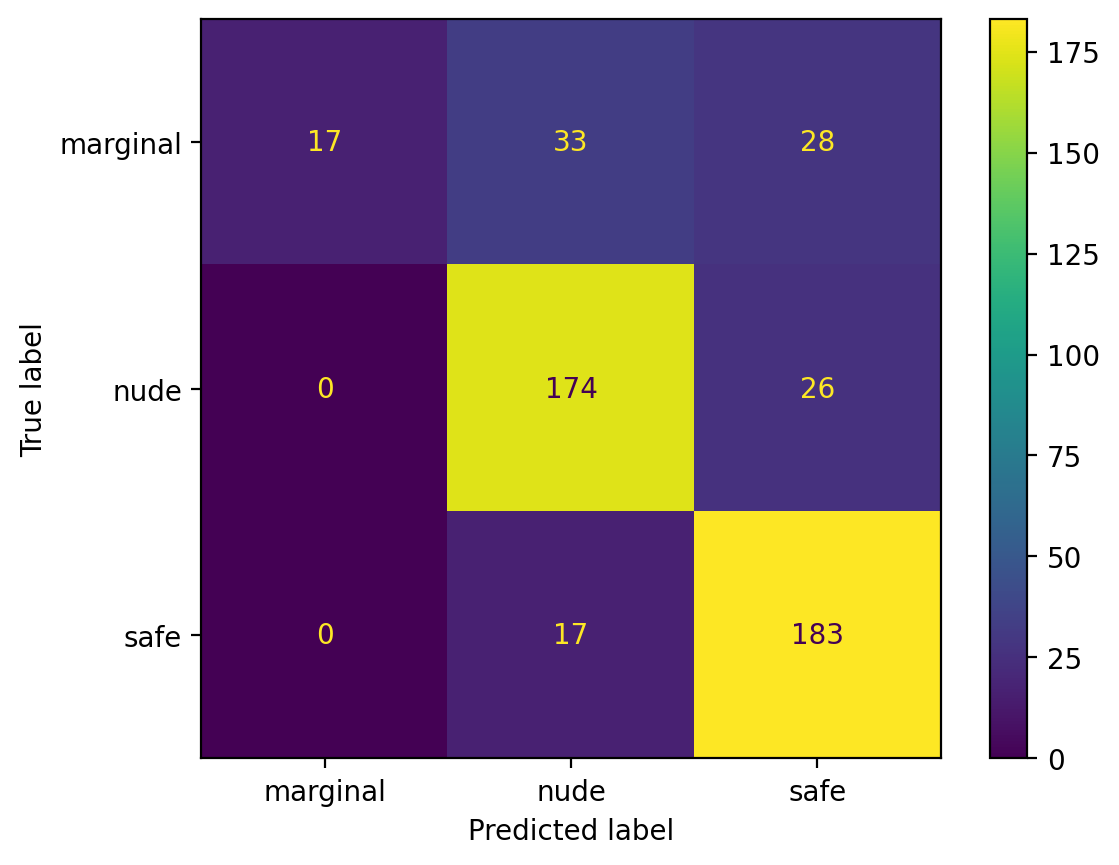

validation_data Loss: 0.6558 Acc: 0.7824
Cкопировано!
Epoch 1/10
----------


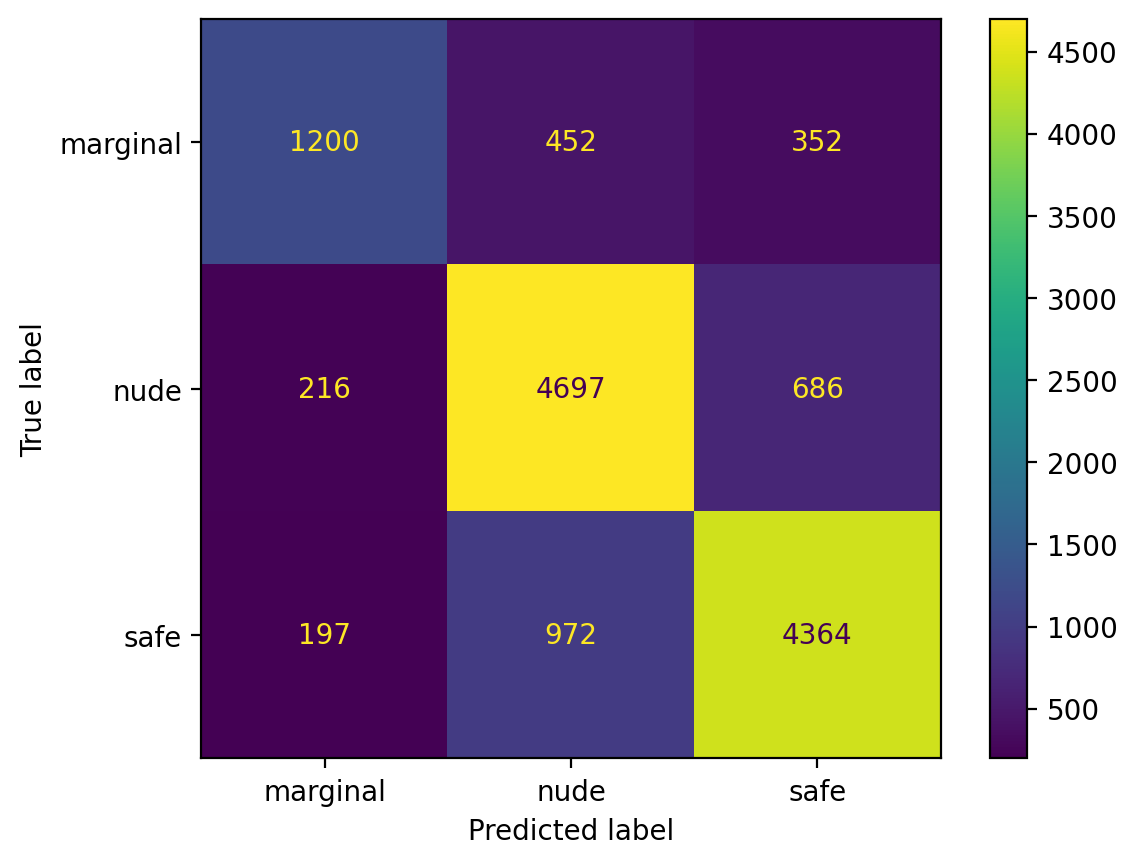

train_data Loss: 0.5384 Acc: 0.7811


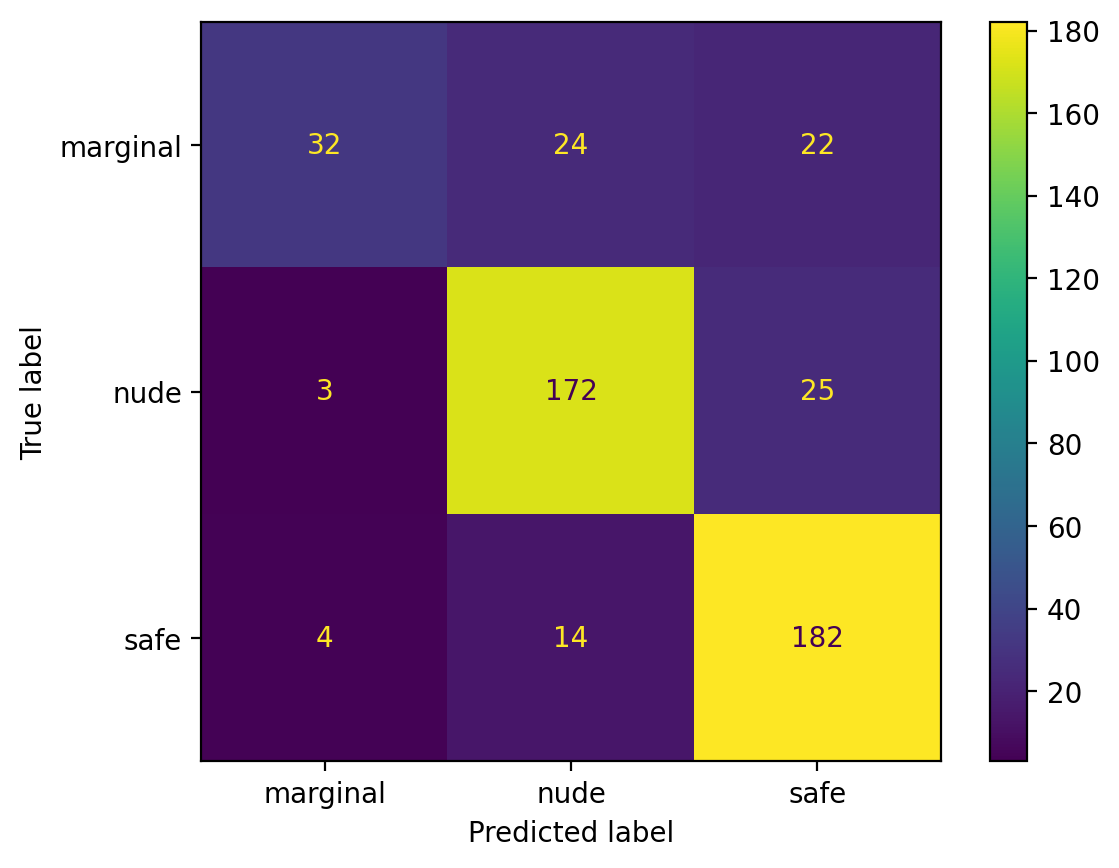

validation_data Loss: 0.5282 Acc: 0.8075
Cкопировано!
Epoch 2/10
----------


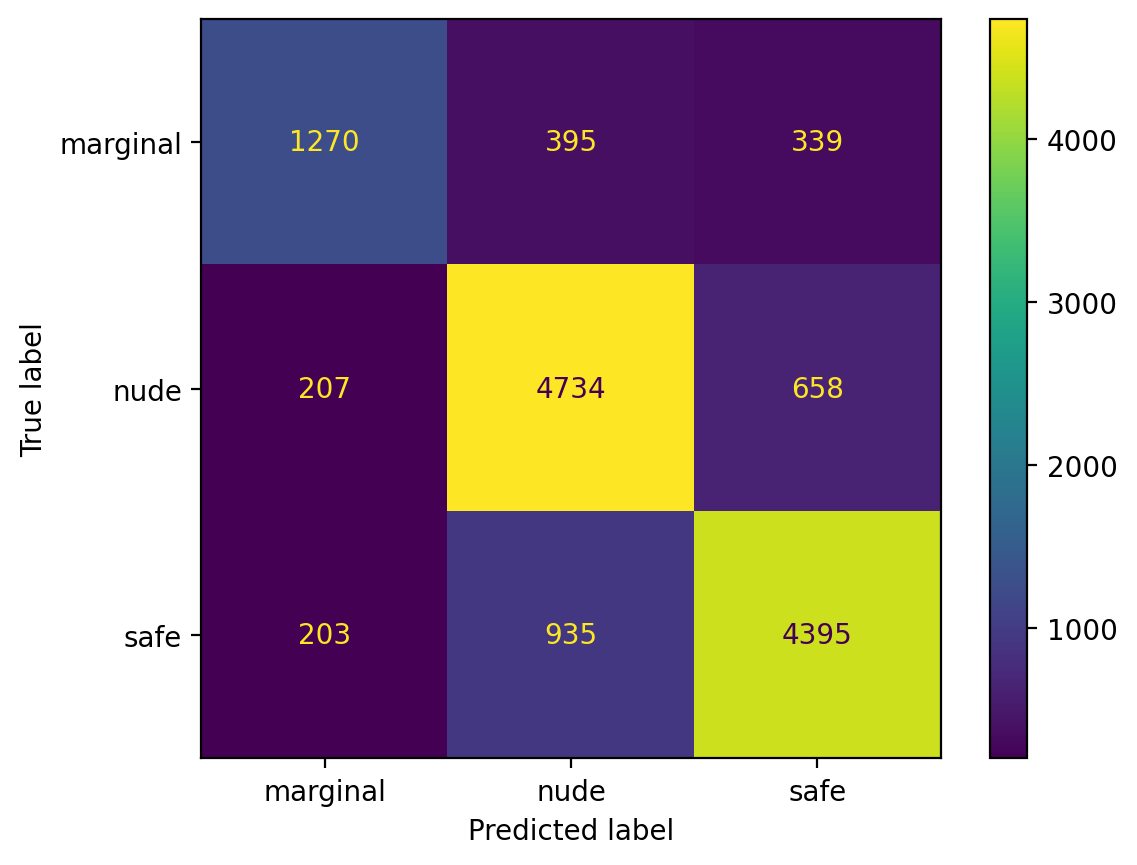

train_data Loss: 0.5149 Acc: 0.7916


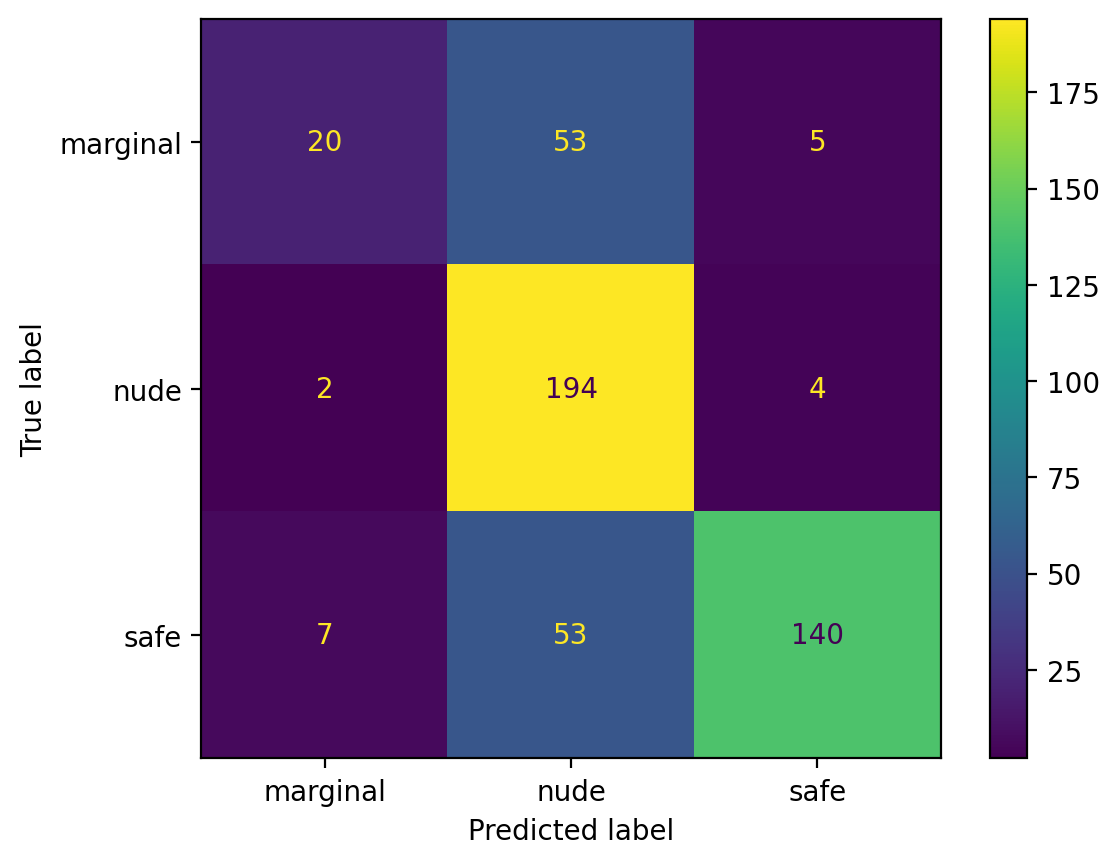

validation_data Loss: 0.6888 Acc: 0.7406
Epoch 3/10
----------


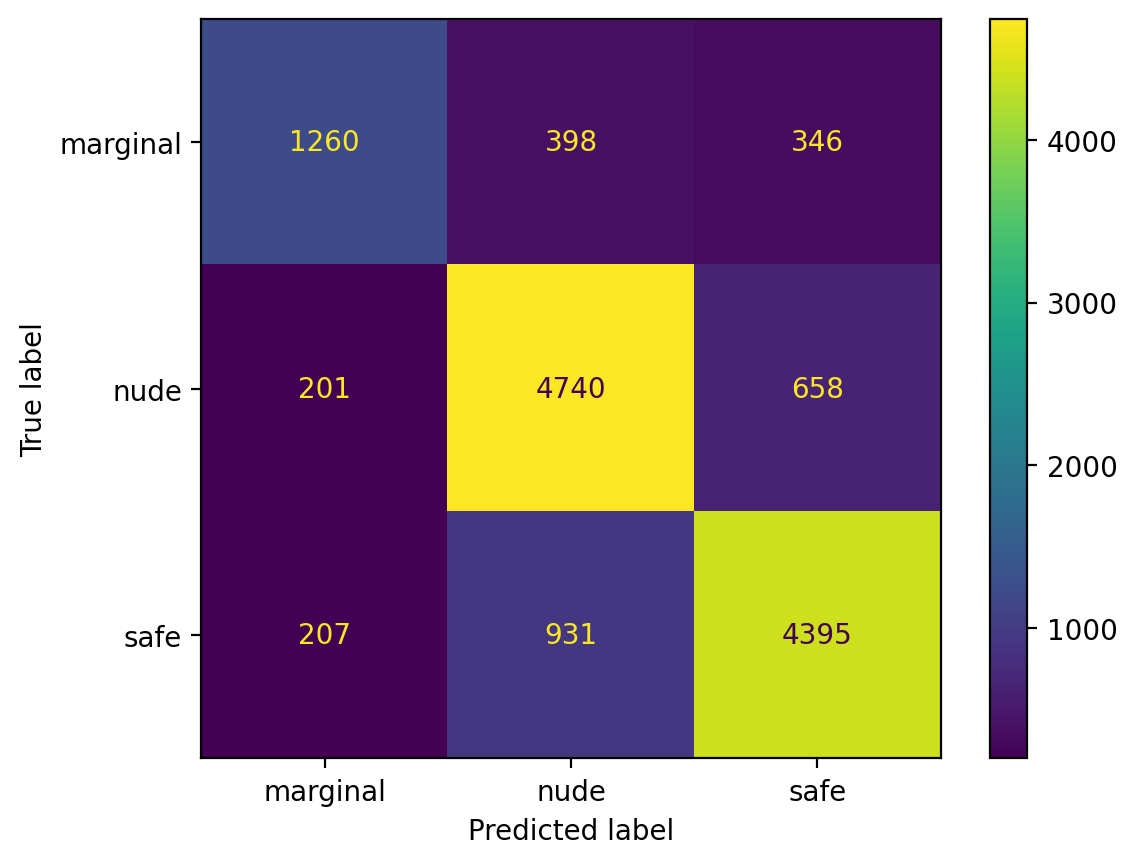

train_data Loss: 0.5229 Acc: 0.7913


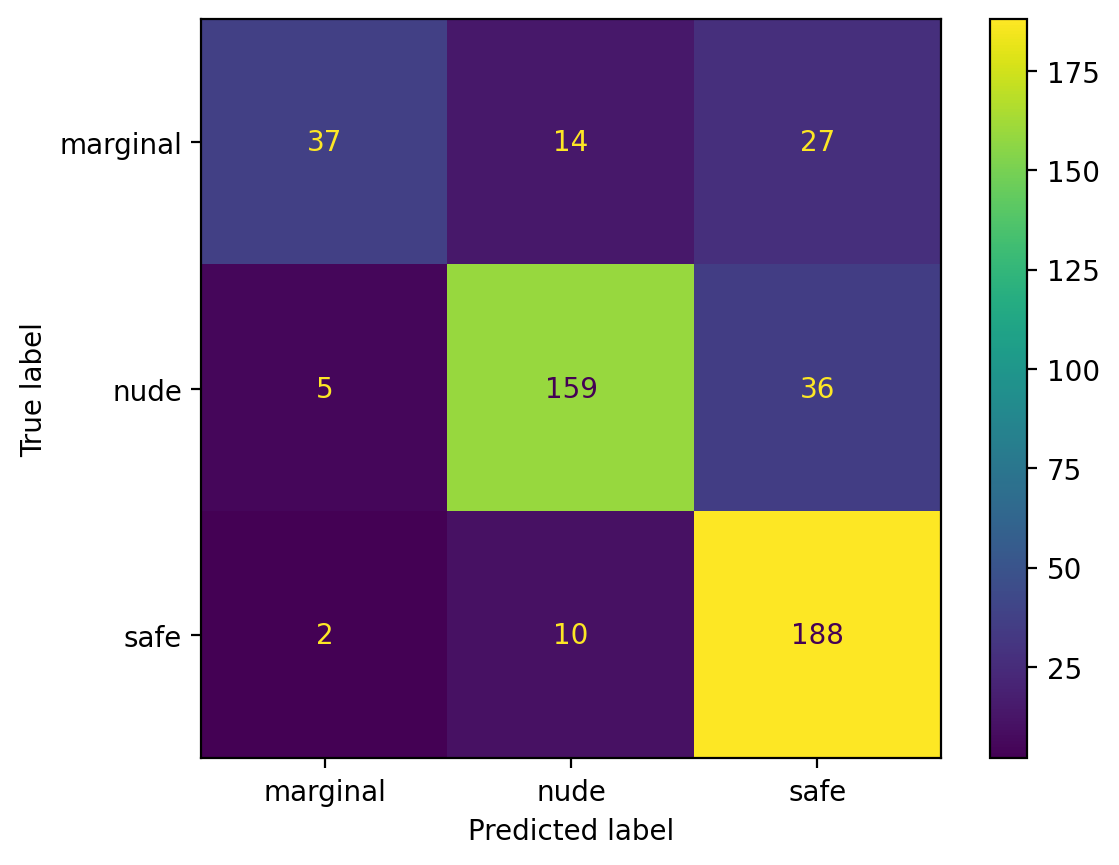

validation_data Loss: 0.5923 Acc: 0.8033
Epoch 4/10
----------


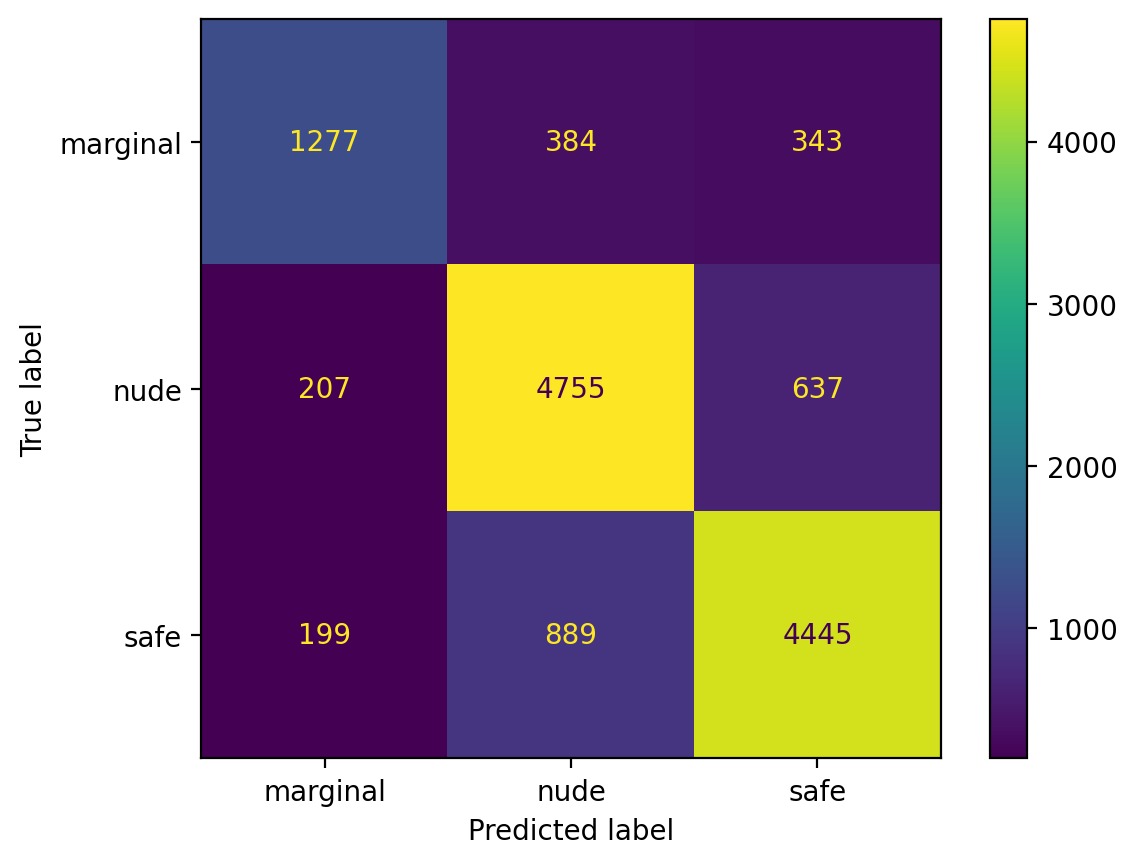

train_data Loss: 0.4993 Acc: 0.7976


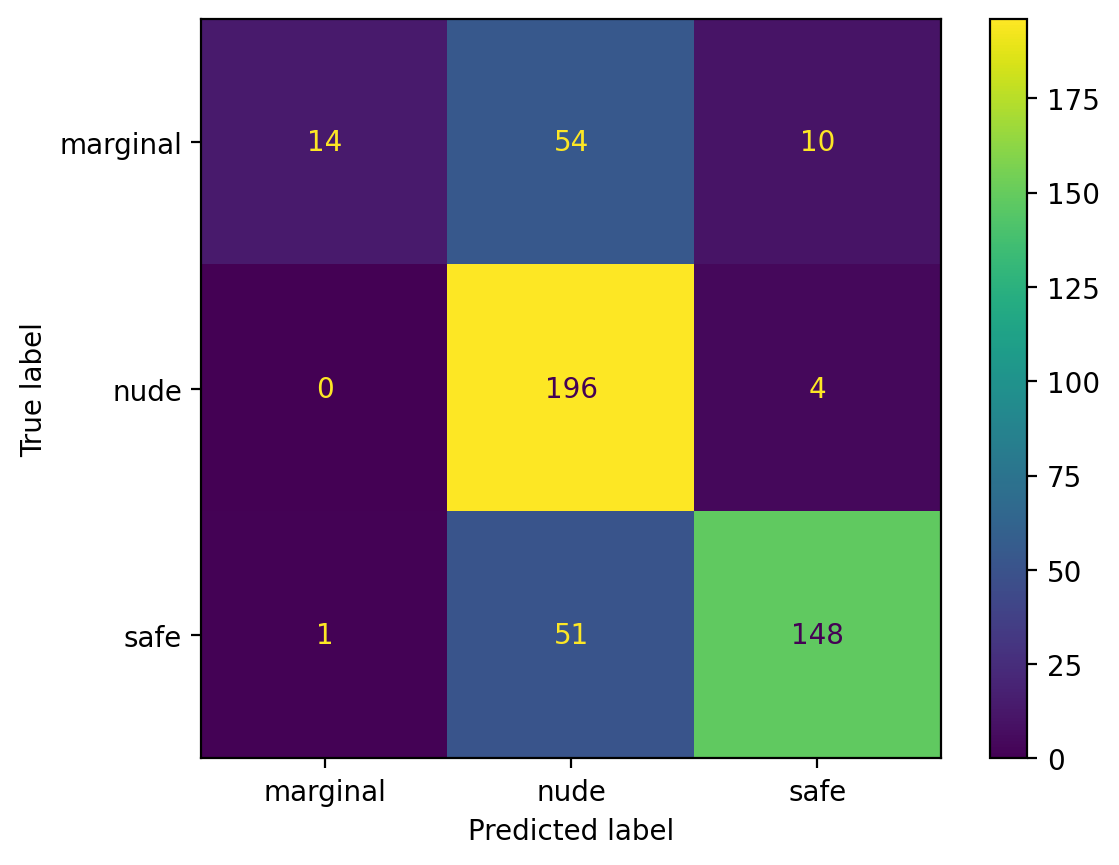

validation_data Loss: 0.7715 Acc: 0.7490
Epoch 5/10
----------


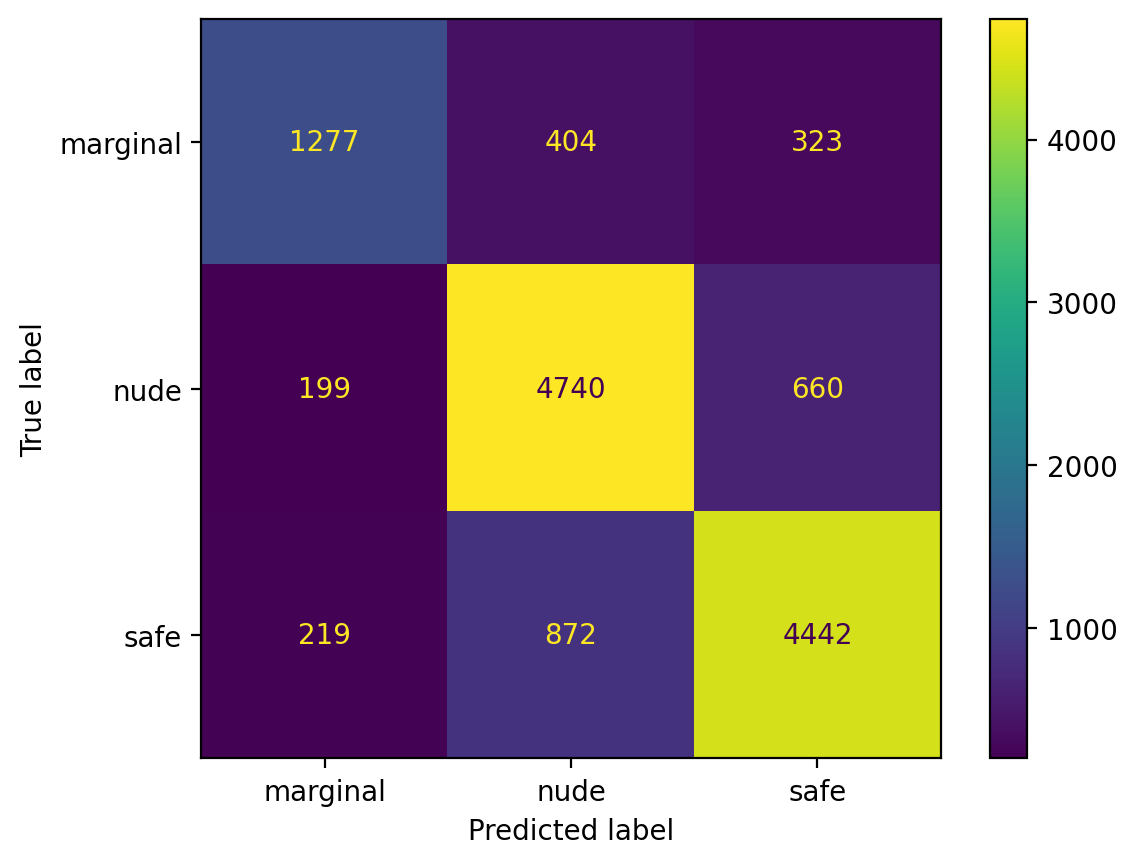

train_data Loss: 0.5123 Acc: 0.7962


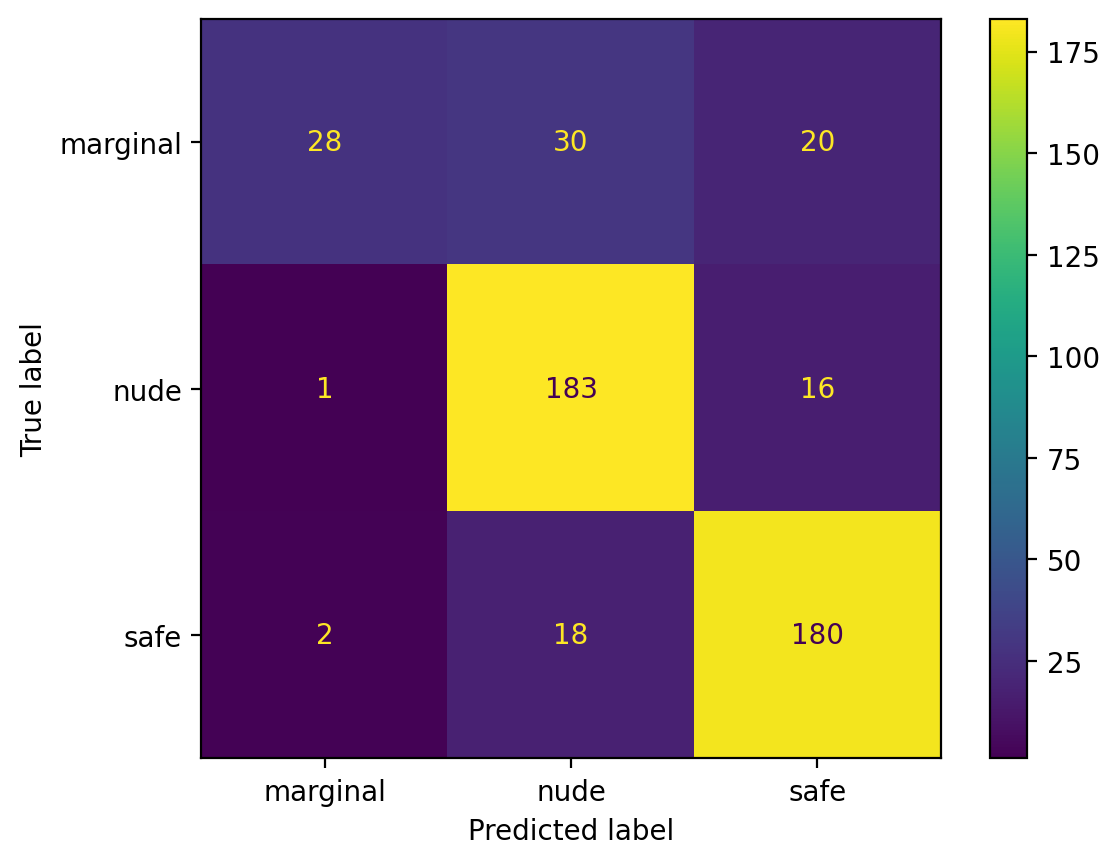

validation_data Loss: 0.5636 Acc: 0.8180
Cкопировано!
Epoch 6/10
----------


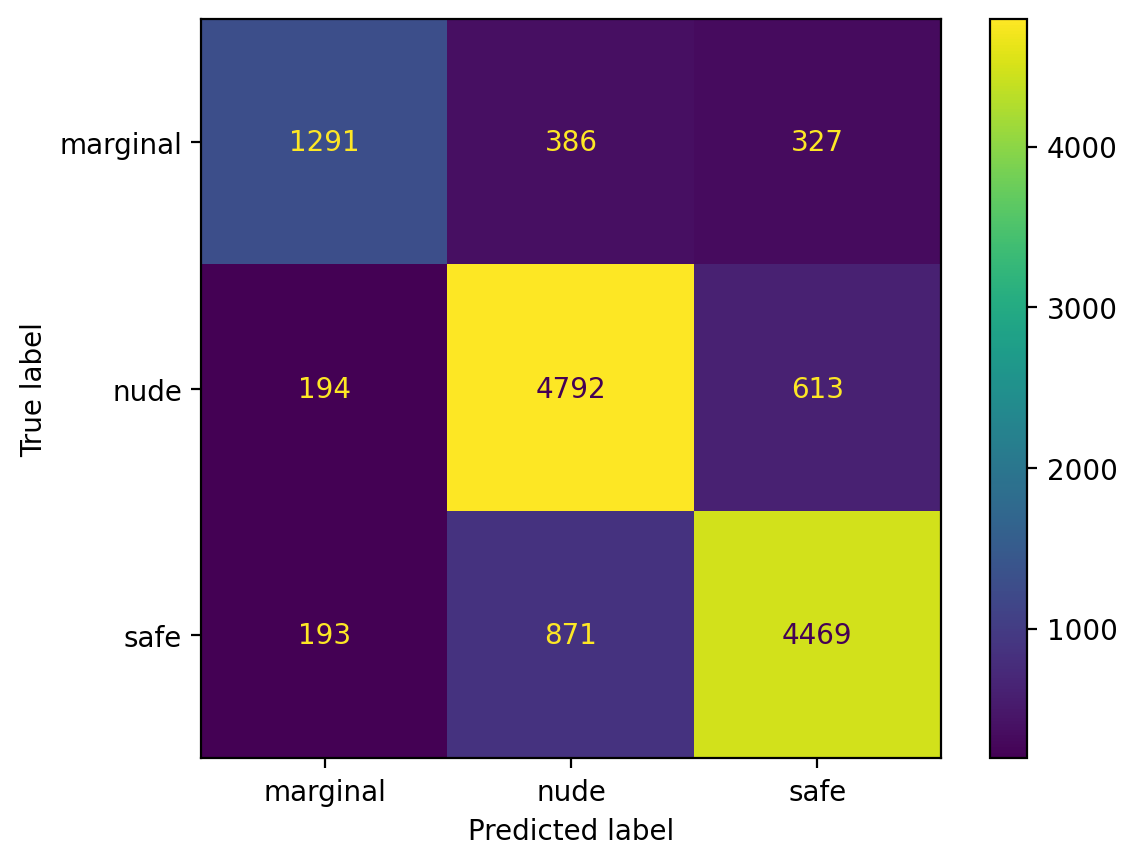

train_data Loss: 0.4982 Acc: 0.8033


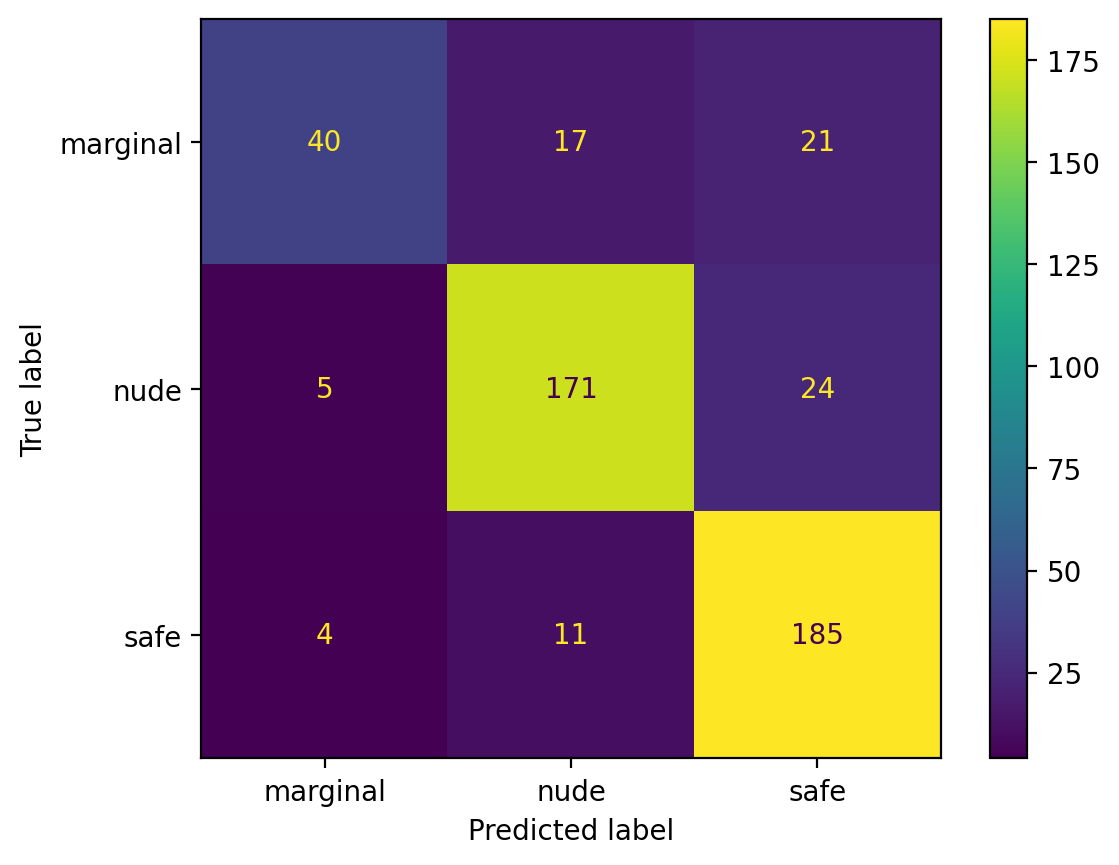

validation_data Loss: 0.5115 Acc: 0.8285
Cкопировано!
Epoch 7/10
----------


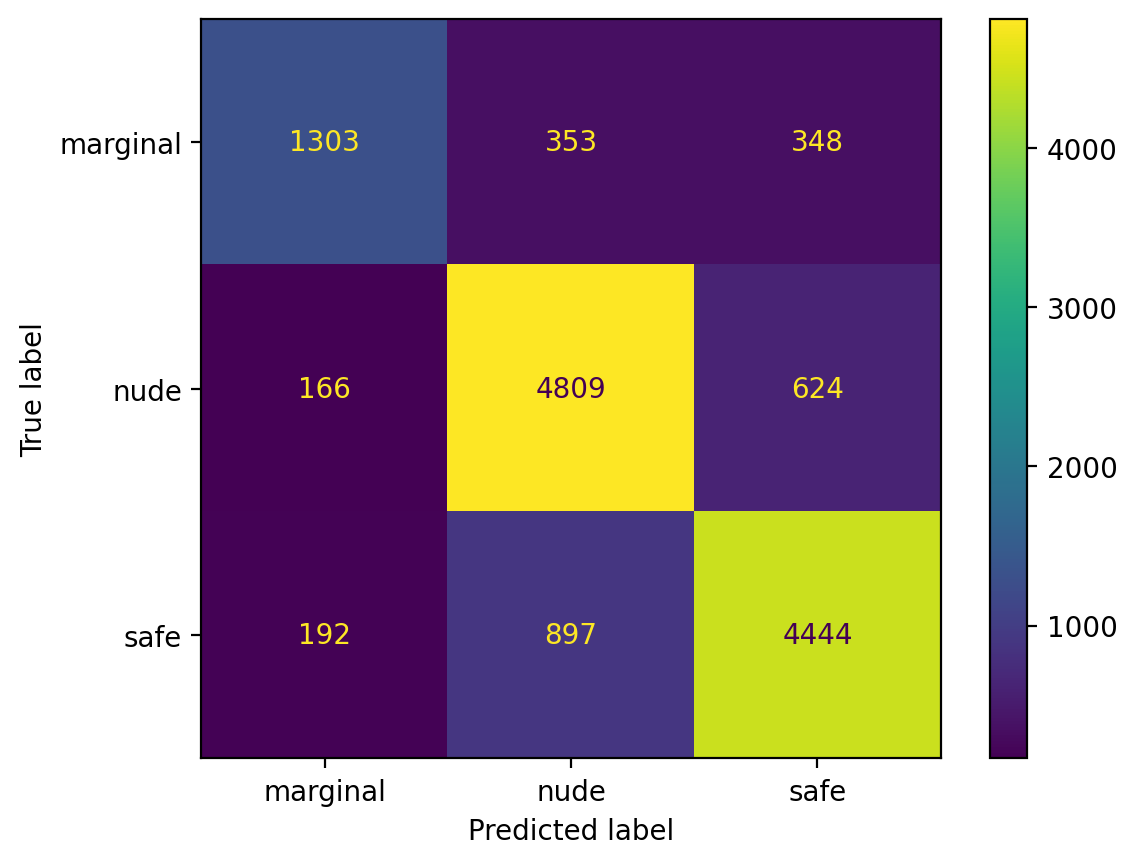

train_data Loss: 0.4947 Acc: 0.8036


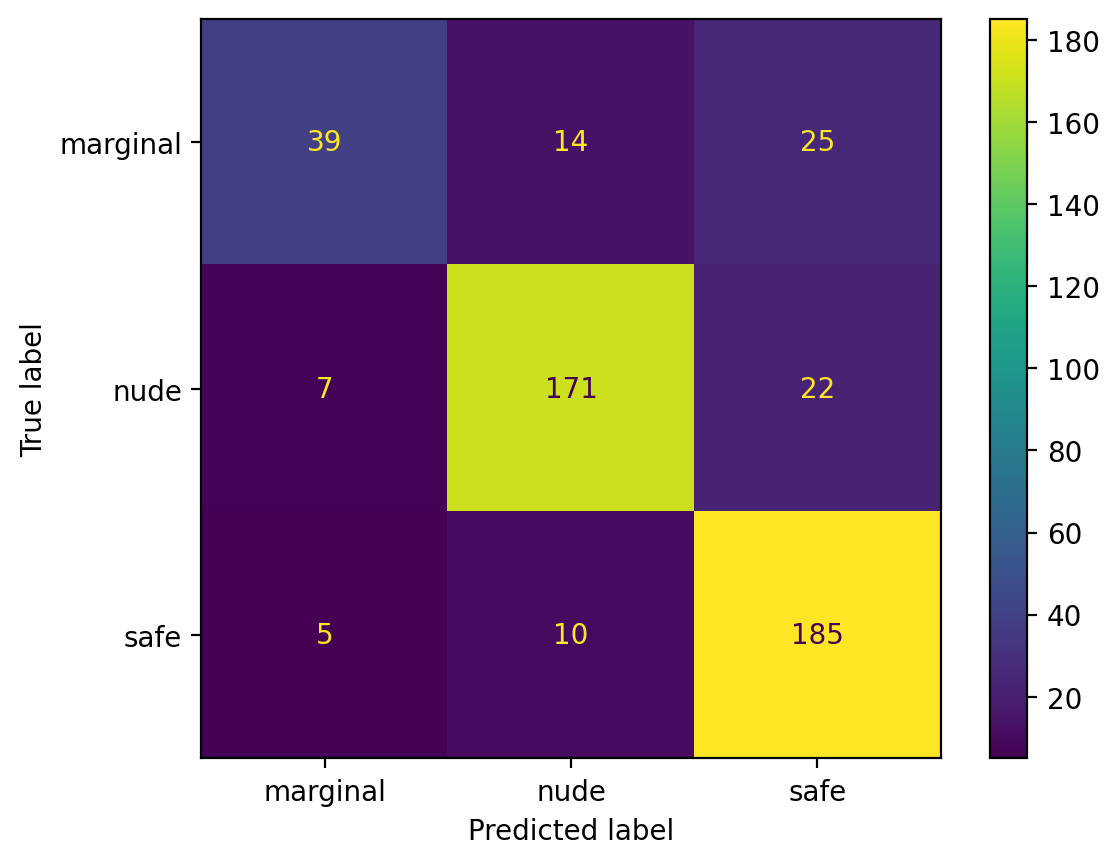

validation_data Loss: 0.5234 Acc: 0.8264
Epoch 8/10
----------


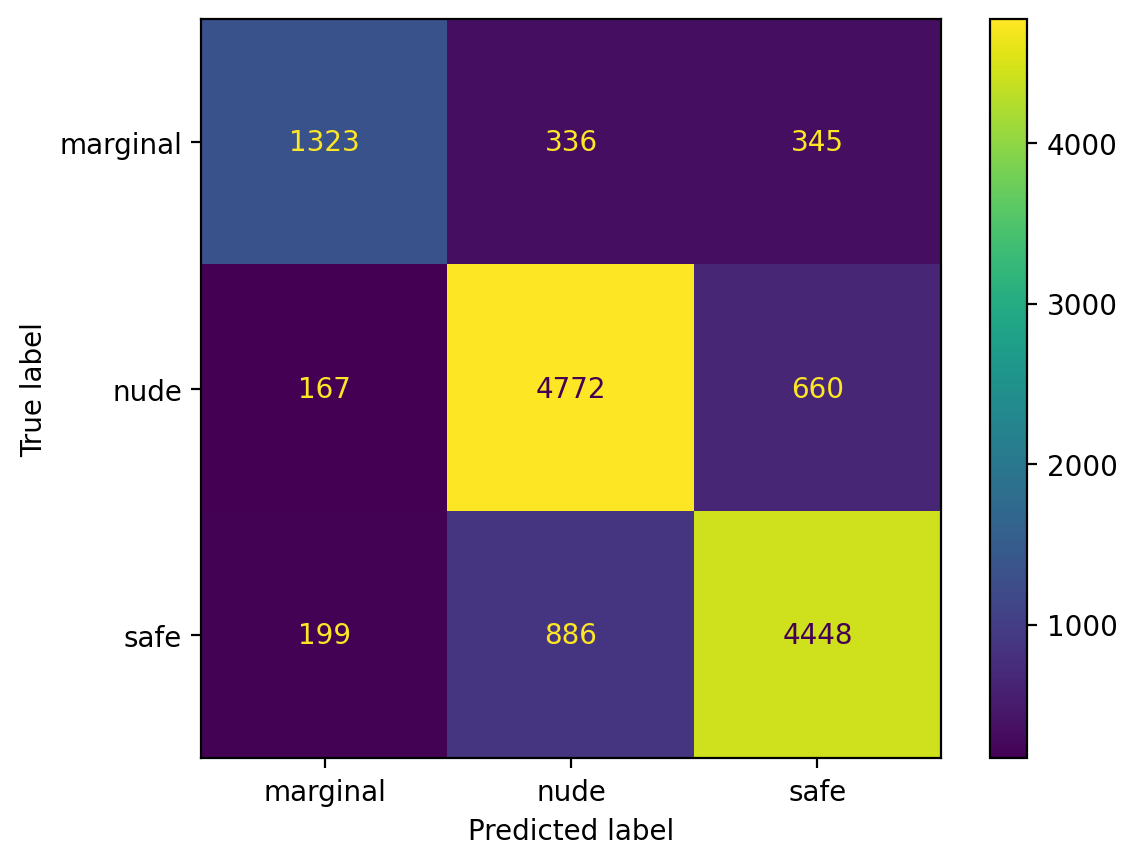

train_data Loss: 0.5021 Acc: 0.8026


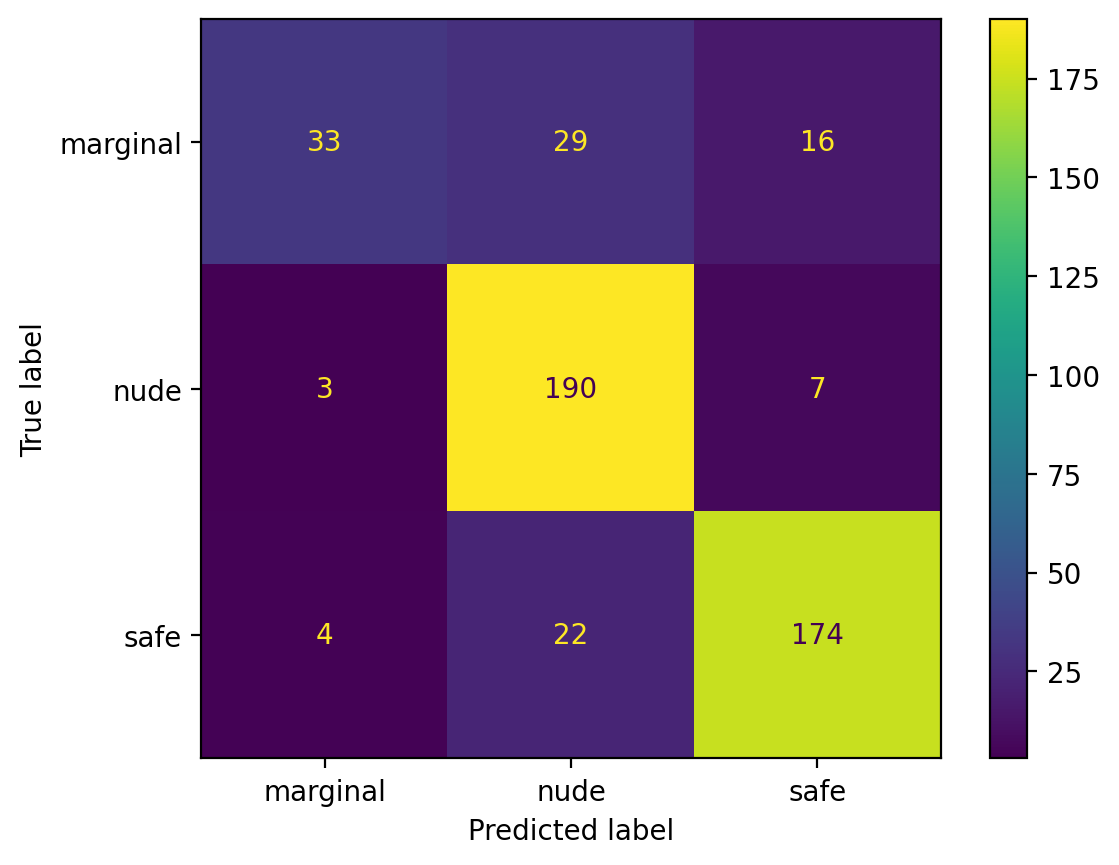

validation_data Loss: 0.5403 Acc: 0.8305
Cкопировано!
Epoch 9/10
----------


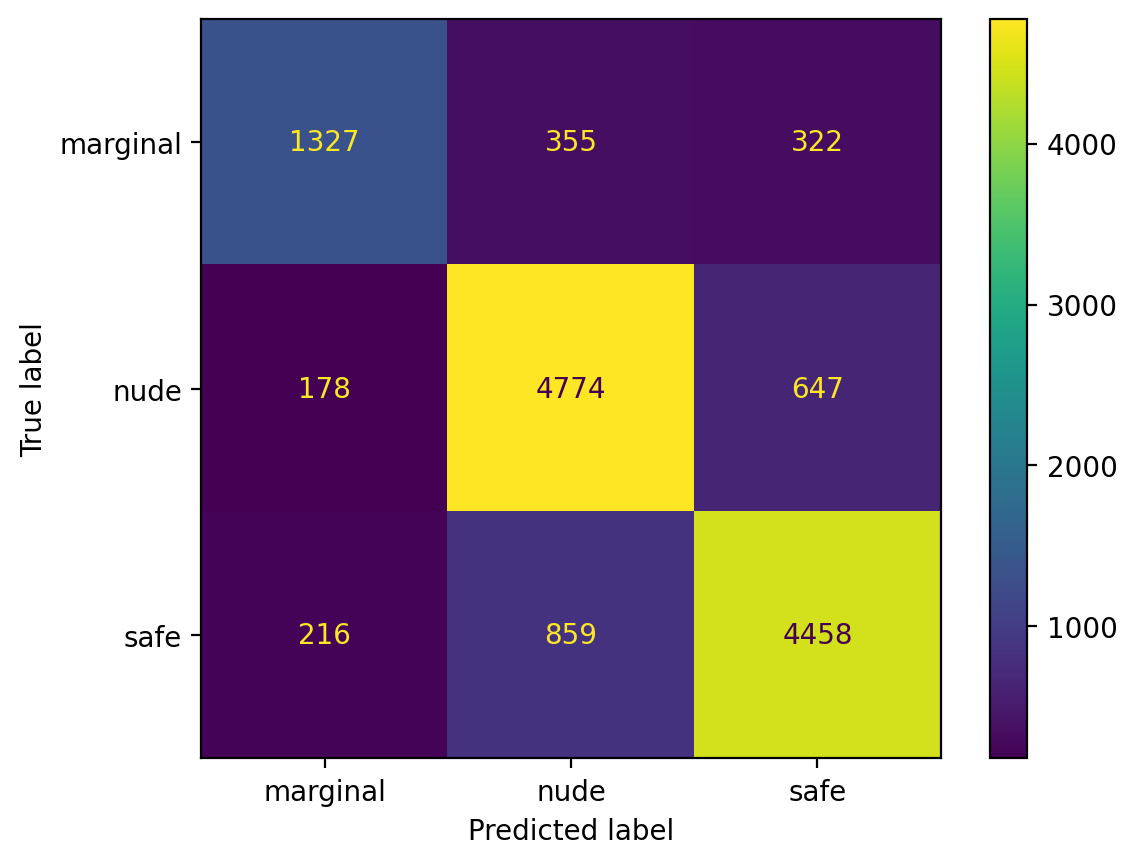

train_data Loss: 0.4907 Acc: 0.8038


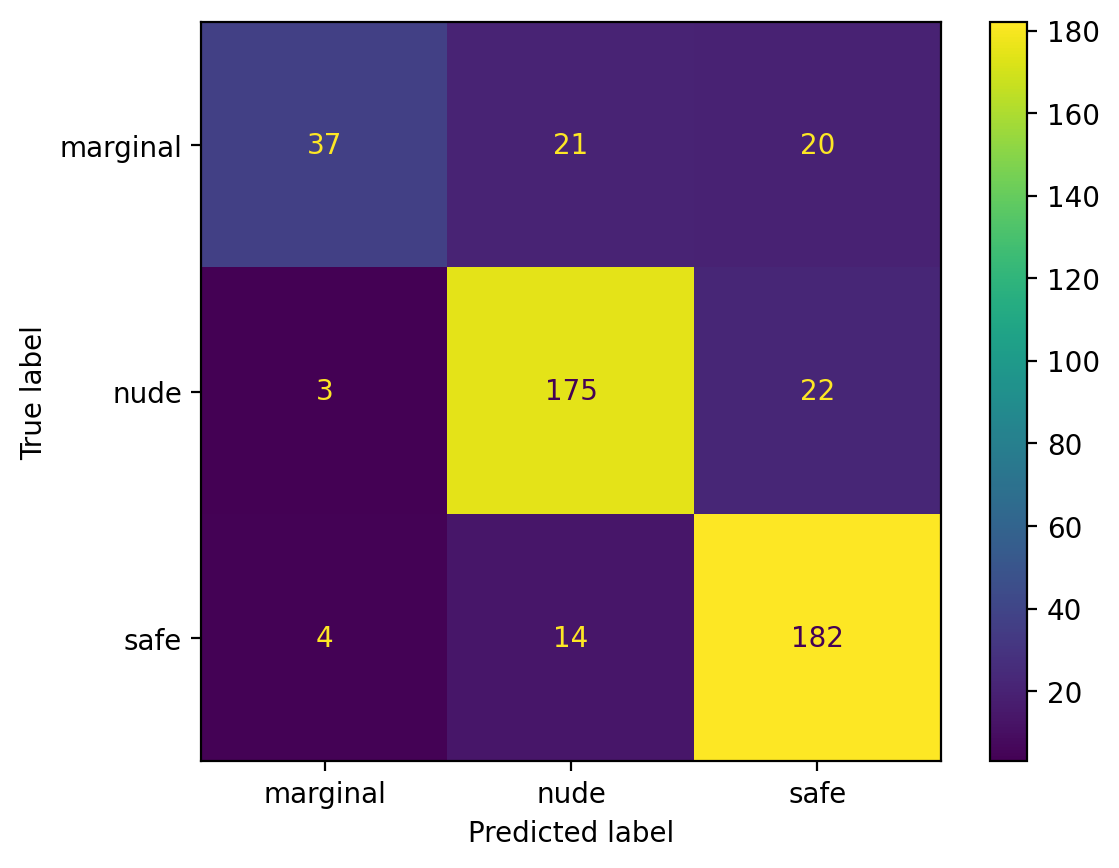

validation_data Loss: 0.5196 Acc: 0.8243
Epoch 10/10
----------


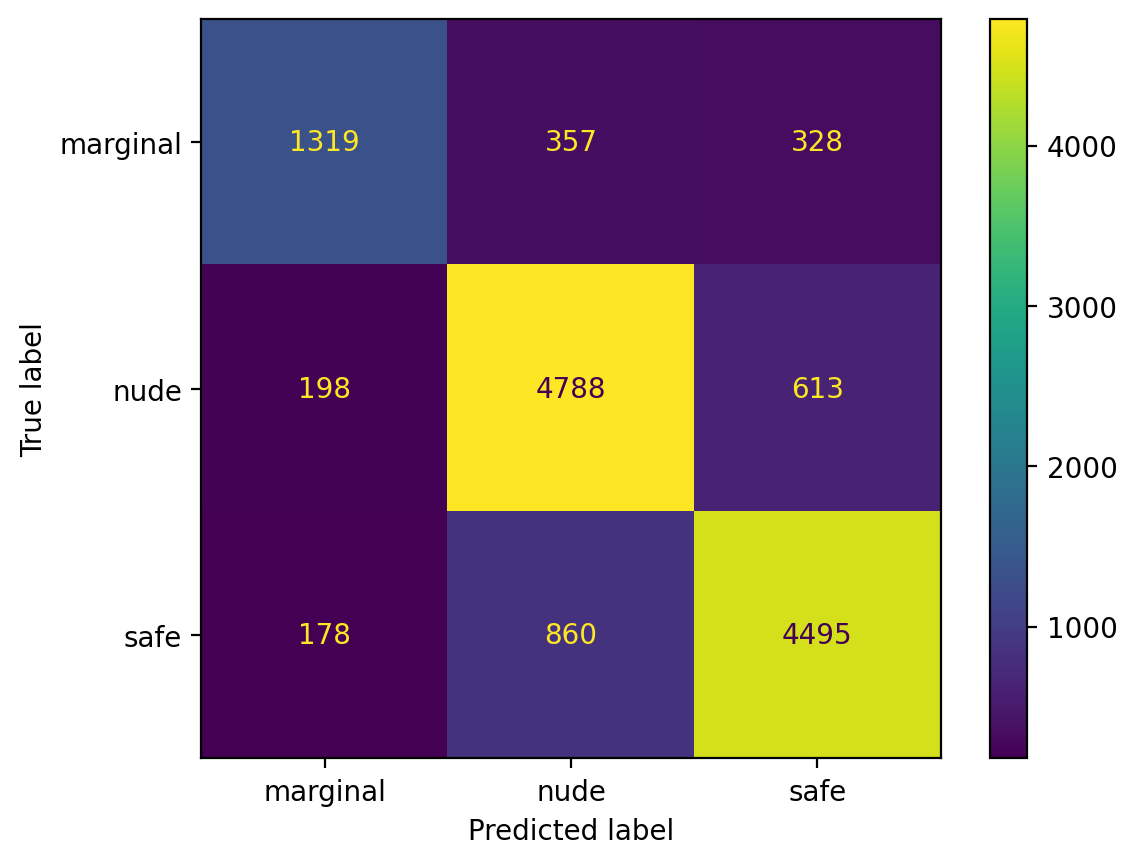

train_data Loss: 0.4902 Acc: 0.8071


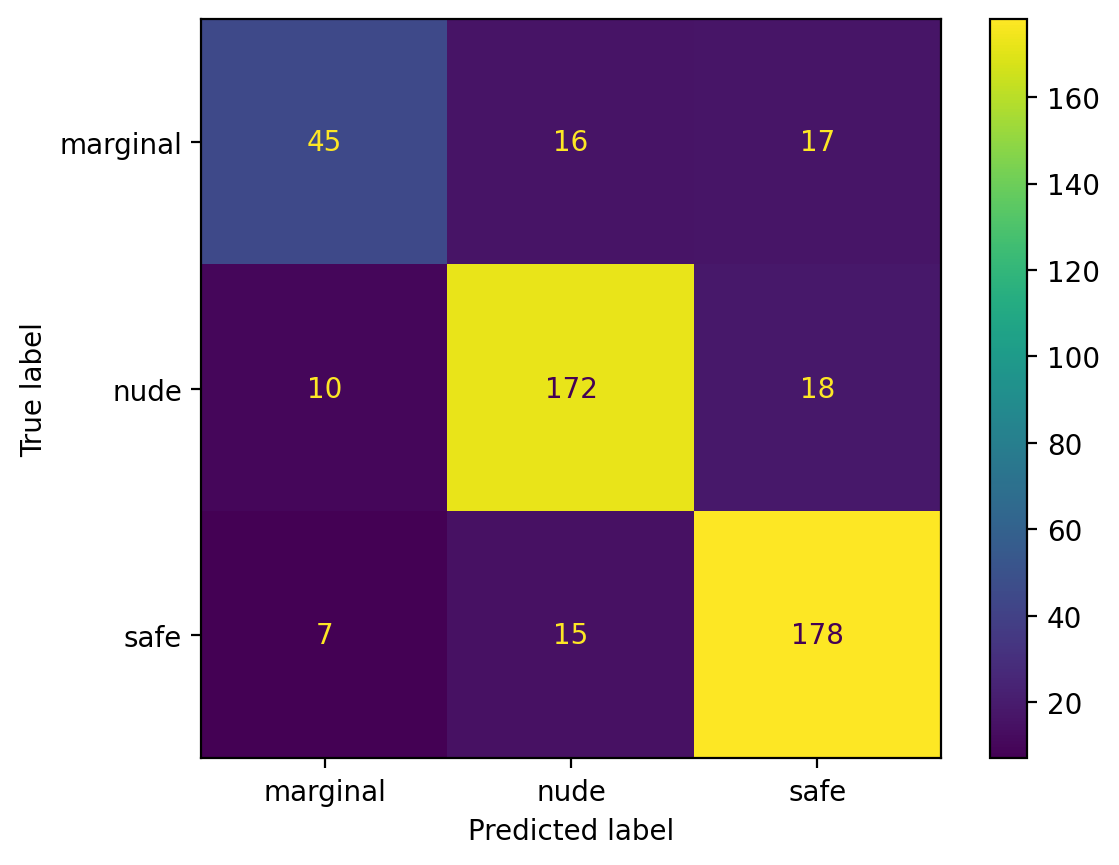

validation_data Loss: 0.5202 Acc: 0.8264

Training complete in 24m 31s
Best val Acc: 0.830544


In [50]:
model = model_training(model, criterion, finetune_optim,
                       number_epochs=11)

In [64]:
test_loss

[0.6558216062050983,
 0.5281603827869917,
 0.6888413667273572,
 0.5923487633840808,
 0.771485141817496,
 0.5635528927941701,
 0.5114743958332548,
 0.5233506511694218,
 0.540335026869714,
 0.5196497806320629,
 0.5202400129459892]

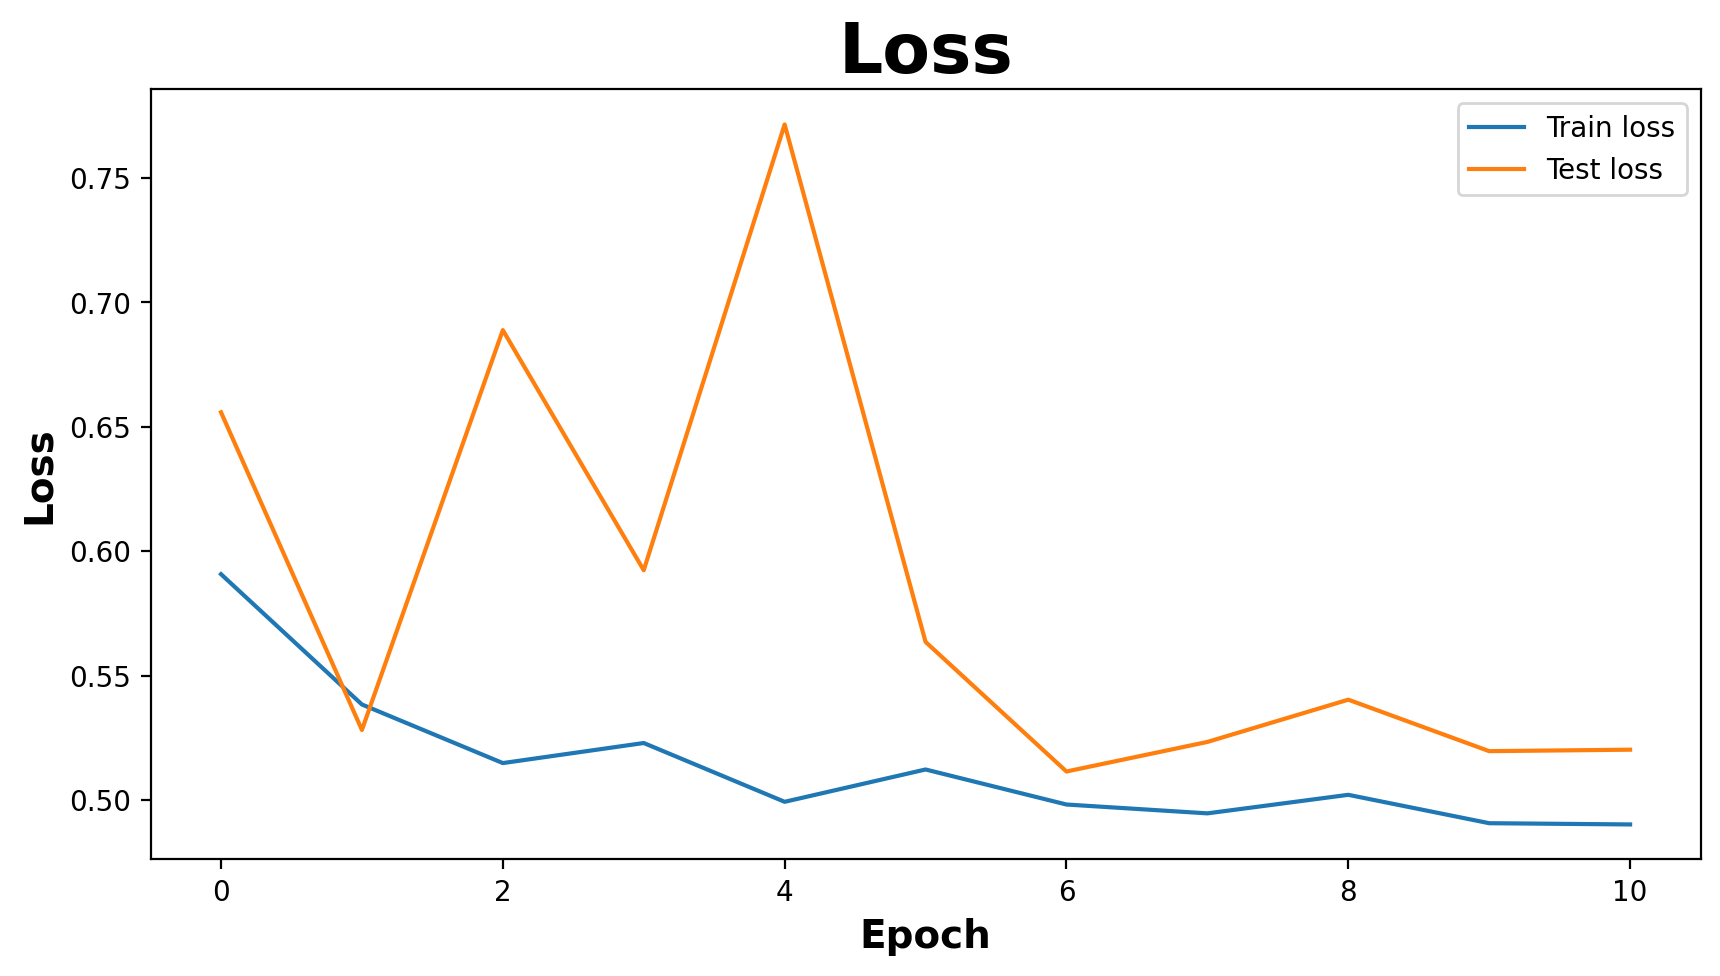

In [52]:
plt.figure(figsize=(10, 5))

plt.title("Loss", fontsize=25, fontweight="bold")
plt.plot(range(11),train_loss,label = 'train')
plt.plot(range(11),test_loss, label = 'test')
plt.xlabel("Epoch", fontsize=14, fontweight="bold")
plt.ylabel("Loss", fontsize=14, fontweight="bold")
plt.legend(["Train loss","Test loss"])
plt.show()

In [53]:
#prediction function
def predict_image(image):
    image_tensor = transformations(image).float()
    image_tensor = image_tensor.unsqueeze_(0)

    if torch.cuda.is_available():
        image_tensor = image_tensor.to(device)

    input = Variable(image_tensor)
    output = model(input)
    index = output.cpu().data.numpy().argmax()
    return index

In [54]:
# classes=['nude', 'people', 'safe']
# import torchvision.transforms as T
# #load images
# entries = test_loader

# for content,batch in entries:
    
#     fig=plt.figure(figsize=(20,20))
#     i=0
    
#     for entry in content:

#         #prediction
             
#         image = T.ToPILImage()(entry)
#         index_true = batch[i]
#         index = predict_image(image)
#         i+=1
#         sub = fig.add_subplot(1, len(batch), i)
#         sub.set_title(classes[index]+'/'+classes[index_true])
#         plt.axis('off')
#         plt.imshow(image)
#     plt.show()

In [55]:
train_acc[0].data

tensor(0.7524, device='cuda:0', dtype=torch.float64)

In [56]:
boxes = [x.cpu().numpy() for x in train_acc]
test_boxes = [x.cpu().numpy() for x in test_acc]
boxes

[array(0.75235993),
 array(0.78113581),
 array(0.79164129),
 array(0.79133678),
 array(0.79757917),
 array(0.79620889),
 array(0.80328867),
 array(0.80359318),
 array(0.80260353),
 array(0.80382156),
 array(0.80709501)]

In [57]:
test_boxes

[array(0.78242678),
 array(0.80753138),
 array(0.74058577),
 array(0.80334728),
 array(0.74895397),
 array(0.81799163),
 array(0.82845188),
 array(0.82635983),
 array(0.83054393),
 array(0.82426778),
 array(0.82635983)]

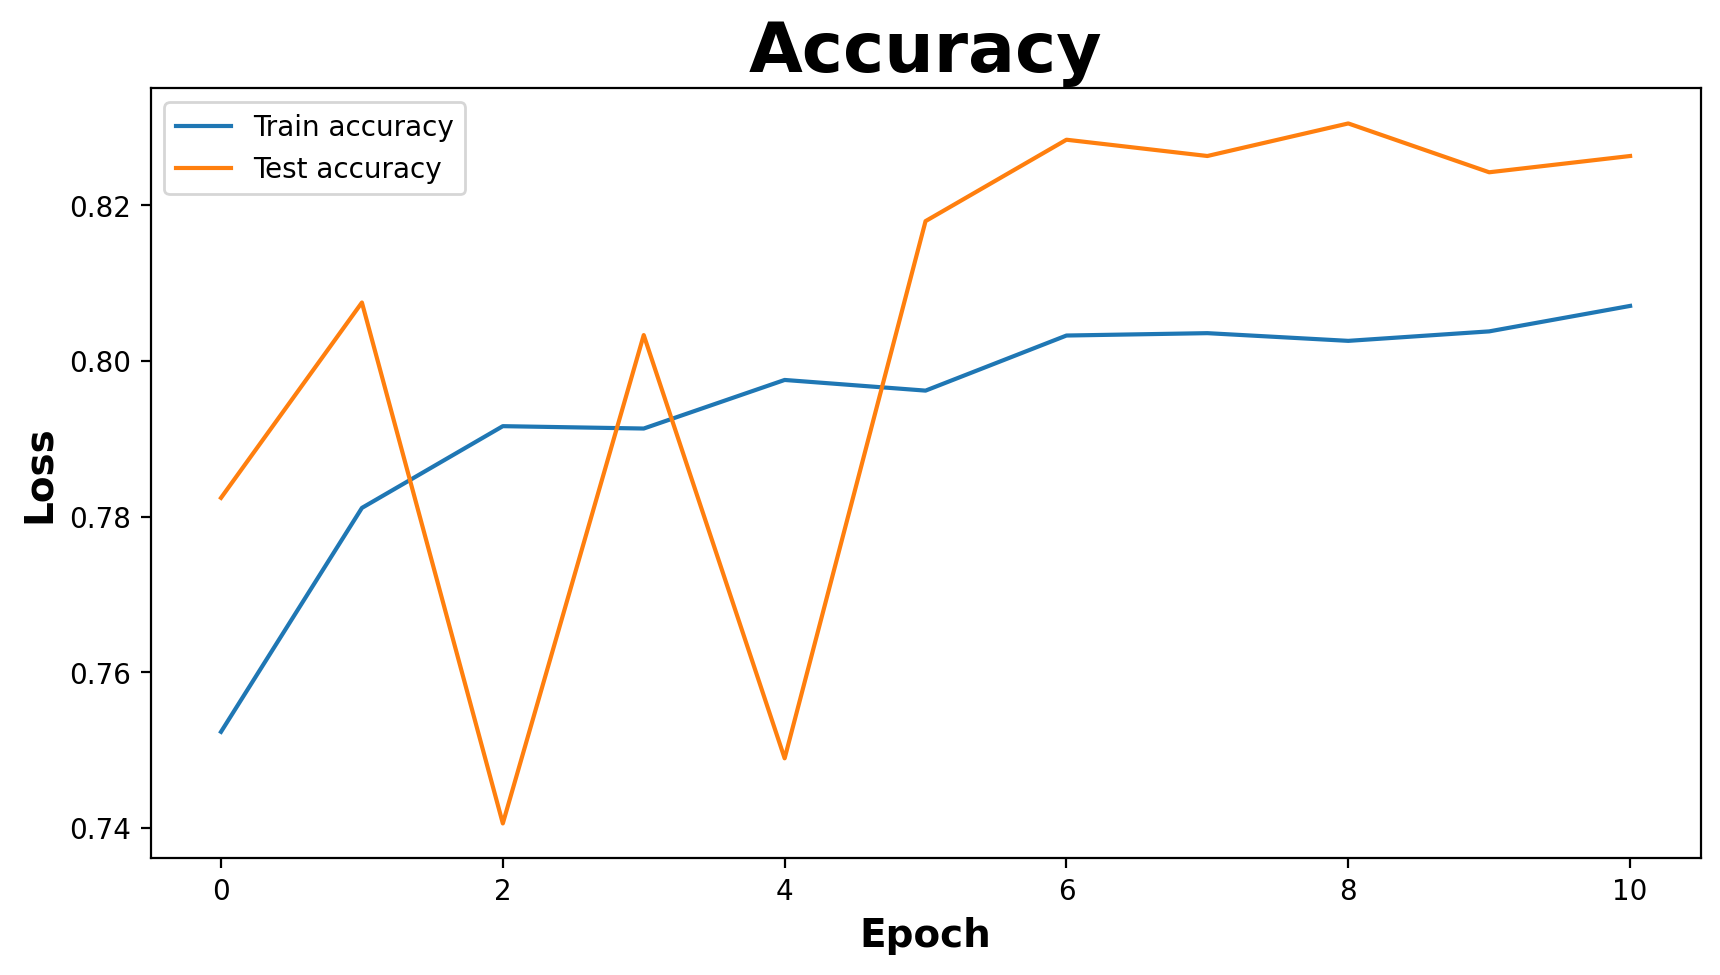

In [58]:
plt.figure(figsize=(10, 5))

plt.title("Accuracy", fontsize=25, fontweight="bold")
plt.plot(range(11),boxes,label = 'train')
plt.plot(range(11),test_boxes, label = 'test')
plt.xlabel("Epoch", fontsize=14, fontweight="bold")
plt.ylabel("Loss", fontsize=14, fontweight="bold")
plt.legend(["Train accuracy","Test accuracy"])
plt.show()

In [62]:
torch.save(model.state_dict(), 'ResNet50_nude_model_3_class.pth')

In [63]:
# model = models.resnet50(pretrained=True)
# in_features = model.fc.in_features


# fc = nn.Linear(in_features = in_features, out_features = 3)
# model.fc = fc
# '''model.fc = nn.Sequential(nn.Linear(2048, 512),
#                                  nn.ReLU(),
#                                  nn.Dropout(0.05),
#                                  nn.Linear(512, 3),
#                                  nn.ReLU())'''
# if torch.cuda.is_available():
#     model = model.to(device)
# model.load_state_dict(torch.load('ResNet50_nsfw_model_0.pth'))
# model.eval()

In [ ]:
# inputs = test_transforms(img_collect[0][1])
# inputs
# if torch.cuda.is_available():
#     inputs = inputs.to(device)

In [ ]:
# model(inputs)

In [ ]:
# finetune_model.eval()

In [ ]:
model.eval()

In [ ]:
# #prediction function
# def predict_image(image):
#     image_tensor = transformations(image).float()
#     image_tensor = image_tensor.unsqueeze_(0)

#     if torch.cuda.is_available():
#         image_tensor = image_tensor.to(device)

#     input = Variable(image_tensor)
#     output = model(input)
#     index = output.cpu().data.numpy().argmax()
#     return index

In [ ]:
# class_names

In [ ]:
# #model classes
# classes=['nude', 'safe_people', 'safe']

# data_dir = '/kaggle/input/probe-set/probe/'
# # data_dir = '/kaggle/input/final-nude-dataset/final_dataset_nood/test/nude/'


# #load images
# entries = os.listdir(data_dir)

# fig=plt.figure(figsize=(10,10))
# i=0

# for entry in entries:
#     i+=1
#     image = Image.open(data_dir+entry)
    
#     #prediction
#     print(image)
#     index = predict_image(image)
#     print(index)
    
#     sub = fig.add_subplot(1, len(entries), i)
#     sub.set_title(classes[index])
#     plt.axis('off')
#     plt.imshow(image)
# plt.show()

In [ ]:
# predict_image(img_collect[0][2])

In [ ]:
# model = models.resnet50(pretrained = True)
# model.fc = nn.Sequential(nn.Linear(2048, 512),
#                                  nn.ReLU(),
#                                  nn.Dropout(0.2),
#                                  nn.Linear(512, 5),
#                                  nn.LogSoftmax(dim=1))
# if torch.cuda.is_available():
#     device = torch.device('cuda')
#     model = model.to(device)
# # model.load_state_dict(torch.load('ResNet50_nsfw_model_0.pth'))
# model.eval()

In [ ]:
# #model classes
# classes=['drawings', 'hentai', 'neutral', 'porn', 'sexy']

# #load images
# entries = os.listdir(data_dir)

# fig=plt.figure(figsize=(10,10))
# i=0

# for entry in entries:
#     i+=1
#     image = Image.open(data_dir+entry)
    
#     #prediction
#     index = predict_image(image)
    
#     sub = fig.add_subplot(1, len(entries), i)
#     sub.set_title(classes[index])
#     plt.axis('off')
#     plt.imshow(image)
# plt.show()

**TreshNet**

In [ ]:
# !cp -r /kaggle/input/trash_dataset/trash_dataset /kaggle/working/